# TASK 4 - Exploratory Data Analysis

###### Submitted by: Ghaayathri Devi K

## Description:
This task involves performing exploratory
data analysis on a dataset.

## Responsibility:
Create visualizations to understand the
distribution of variables, identify outliers, and check for correlations between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [2]:
# Mount google drive (authentication required)
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# File path
file_path = '/content/drive/My Drive/MainFlow Services & Technologies Internship/Task 4/winequality-red.csv'

In [7]:
# Read the csv file into dataframe
df = pd.read_csv(file_path)

In [8]:
# Print the first few rows of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Exploring

In [11]:
# Shape of the data
df.shape  # Hence, there are 1596 samples with 12 features each

(1596, 12)

In [12]:
# Data Comprehension
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [14]:
# Description of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


## Data Pre-processing

In [17]:
# Getting column names
column_names = list(df.columns)
print(column_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [18]:
df.isnull().sum() # There are no null values from the output

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df.nunique() # Checking for the duplicate values

fixed acidity            95
volatile acidity        143
citric acid              79
residual sugar           90
chlorides               152
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       88
sulphates                95
alcohol                  64
quality                   6
dtype: int64

## Exploratory Data Analysis Part

### 1. Univariate Analysis

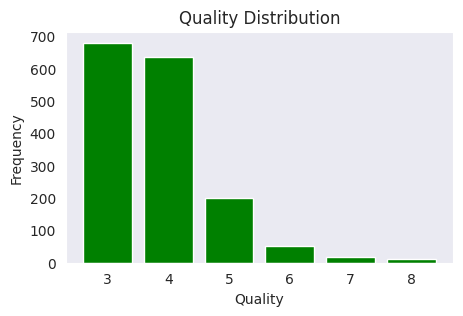

In [34]:
# Bar Plot
plt.figure(figsize=(5, 3))
quality = list(set(df["quality"].values))
quality_freq = list(df["quality"].value_counts().values)
plt.bar(quality, quality_freq, color="green")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Quality Distribution")
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

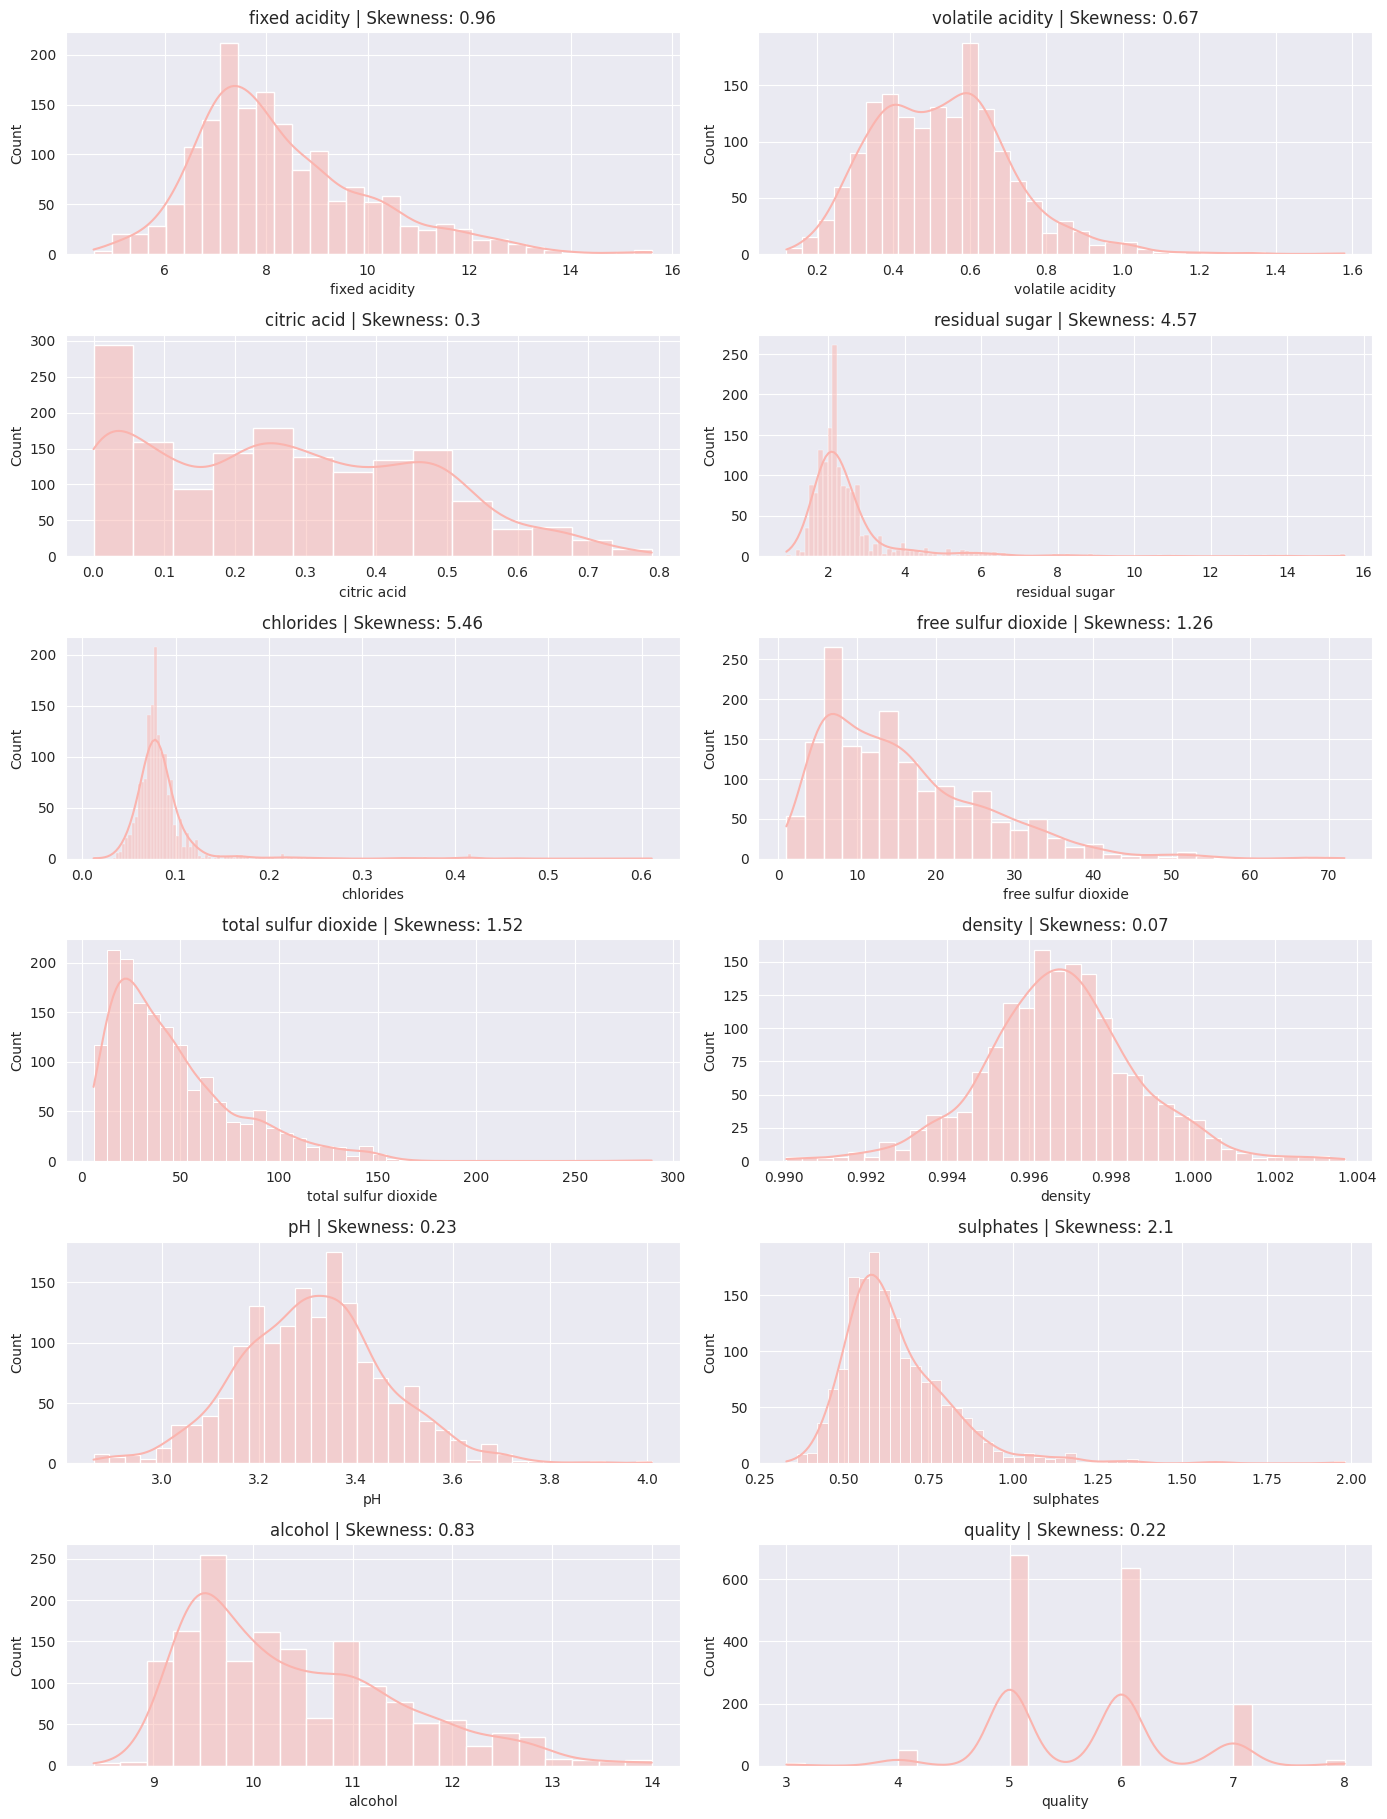

In [35]:
# Histogram

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Skew = 0 --> Symmetric Distribution
# Skew >= 1 --> Right skewed distribution
# Skew <= -1 --> Left skewed distribution

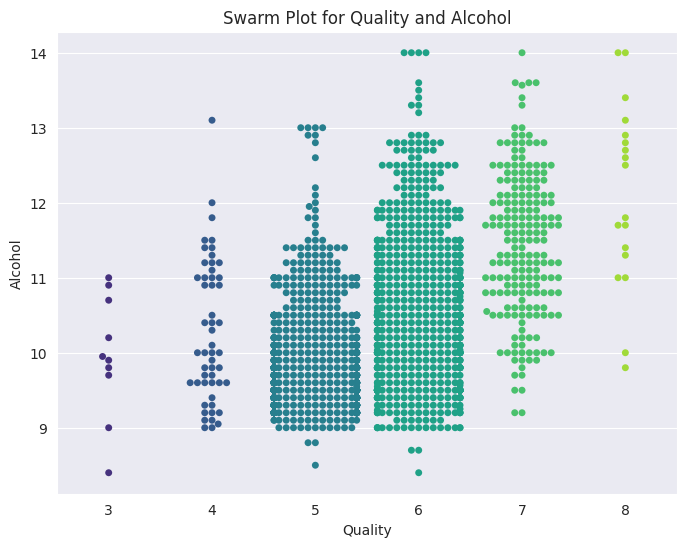

In [36]:
# Create a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Points isolated are the outliers

## 2. Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

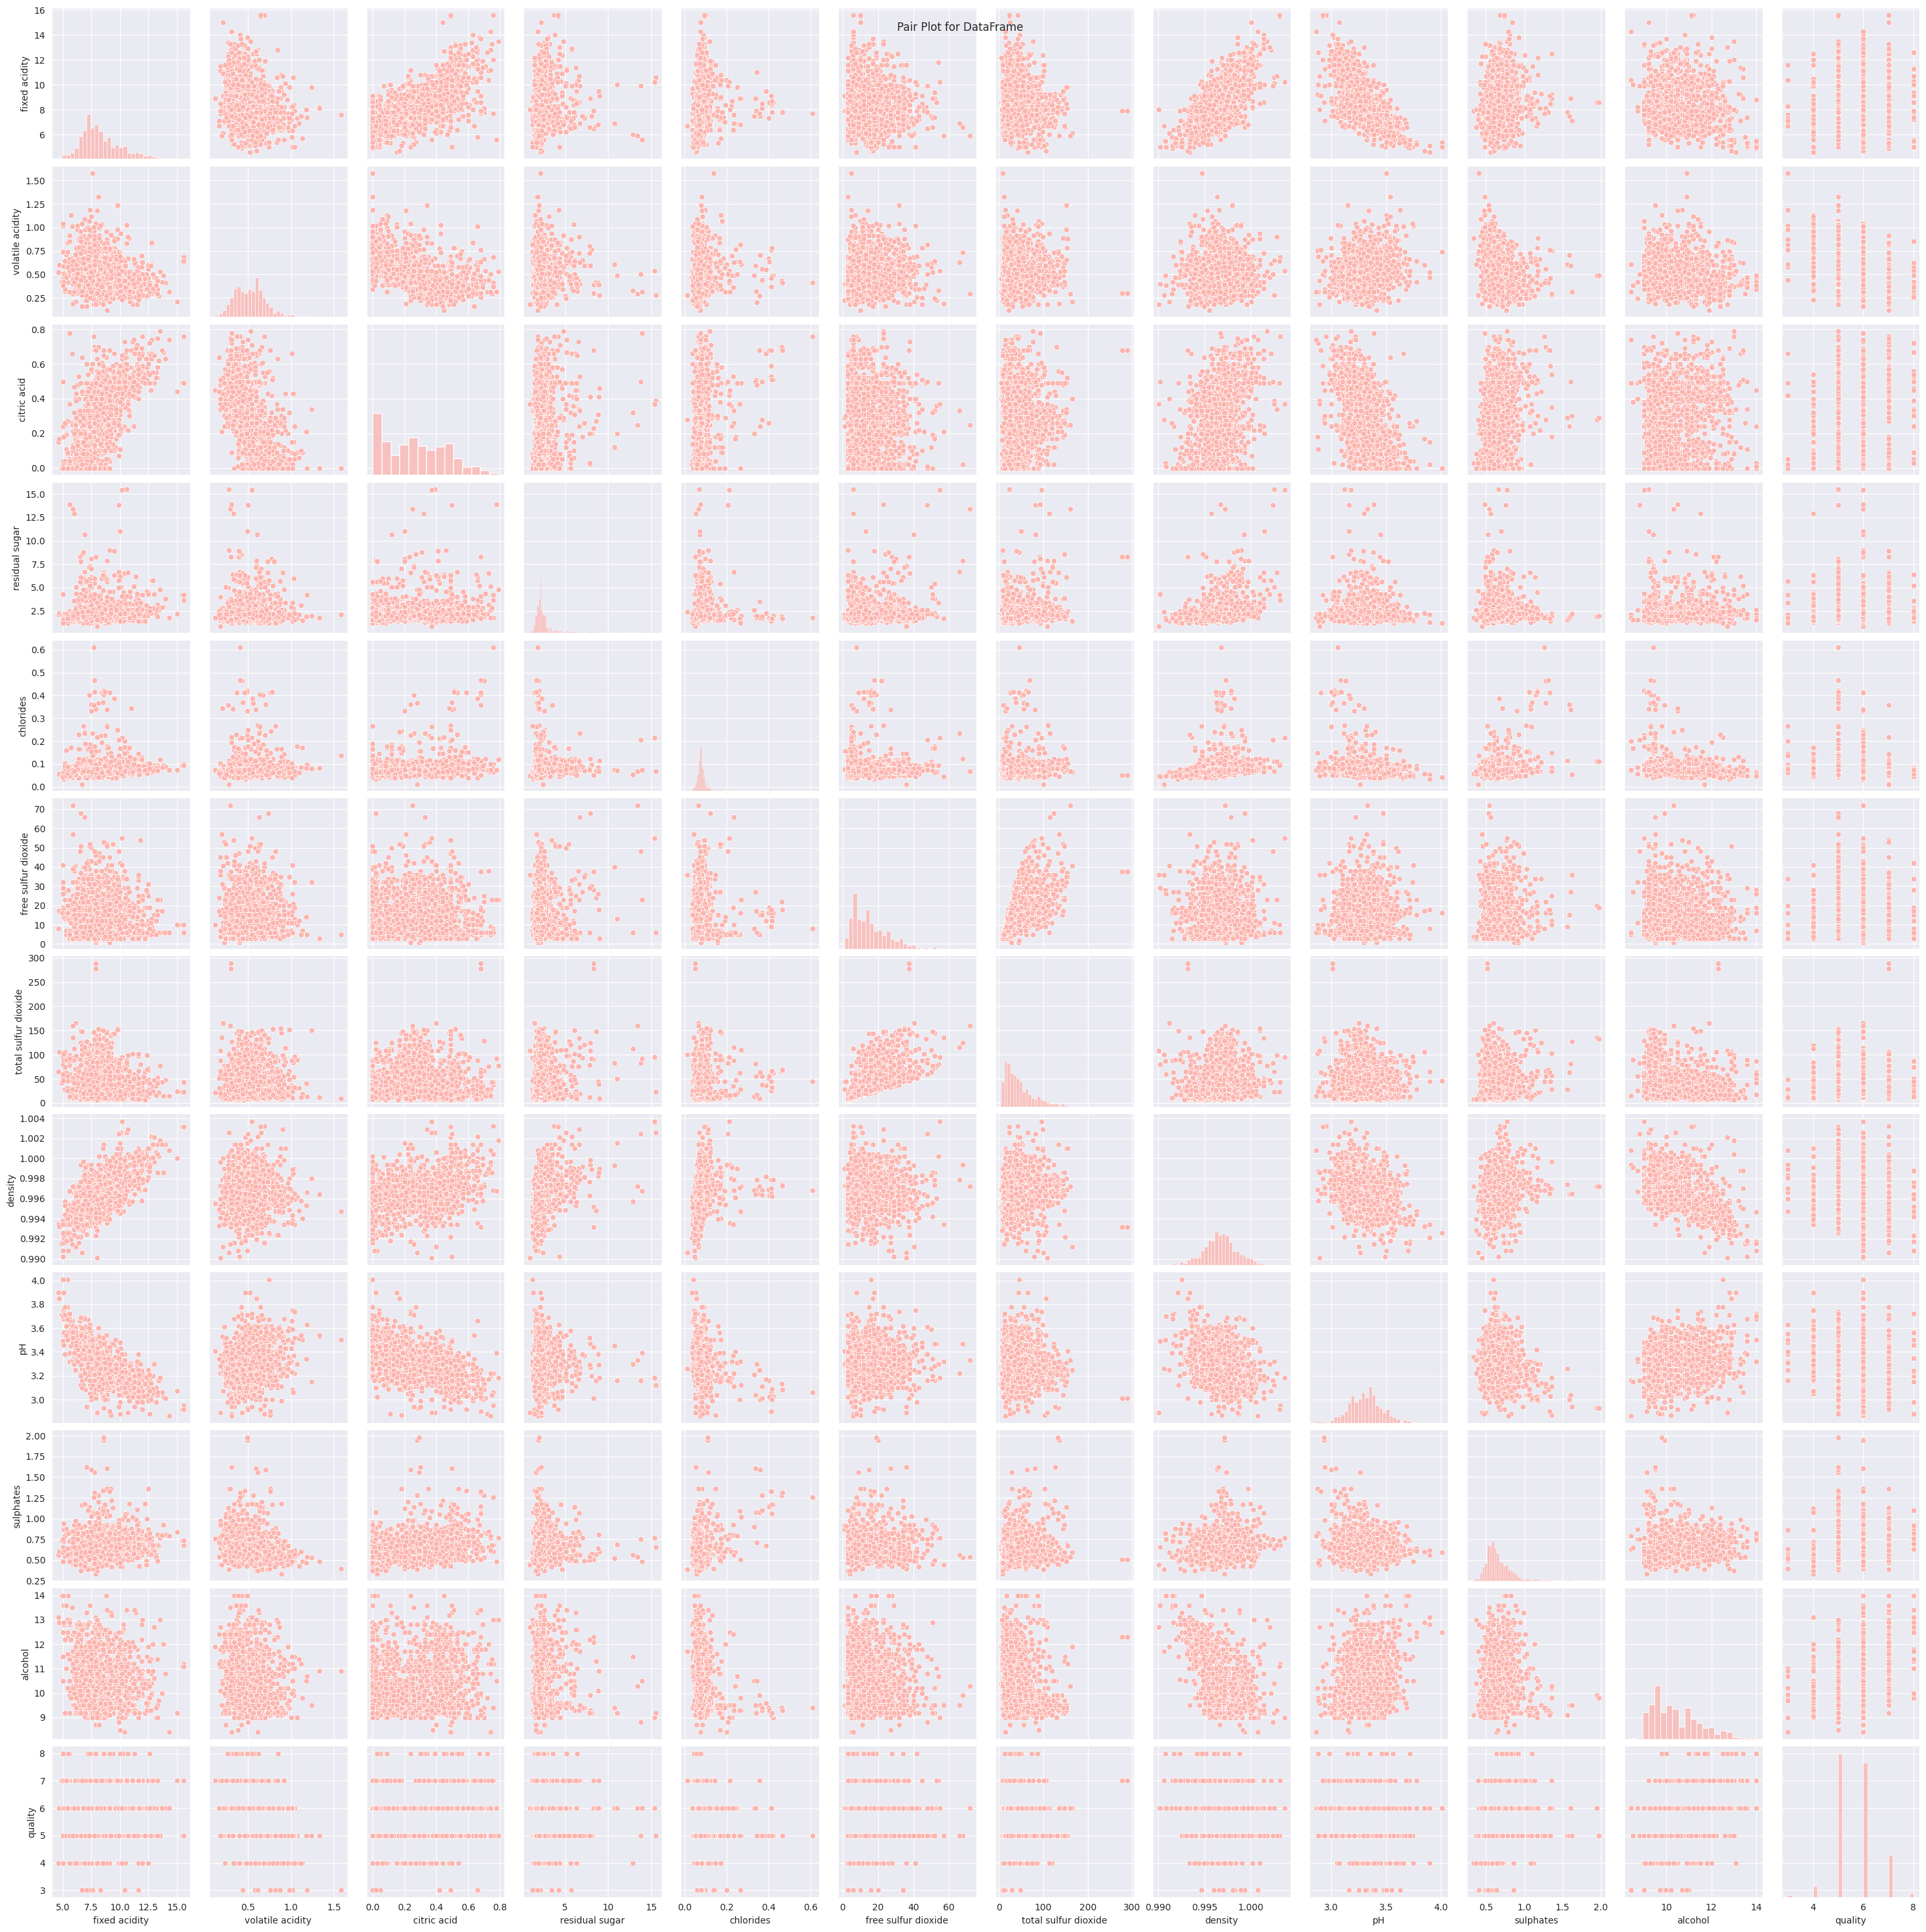

In [37]:
# Kernel Density Plot

sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

*   Diagonal plot: Shows distribution of induvidual variables
*   Scatter plot in lower triangle: Displays relationship between the pairs of the variables
*   Scatter plots above and below the diagonal are mirror images: Symmetrical data
*   Histogram plots are more centered: Represents the locations of peaks
*   Skewness: Can be observed whether the histogram is symmetrical or skewed to the left or right.

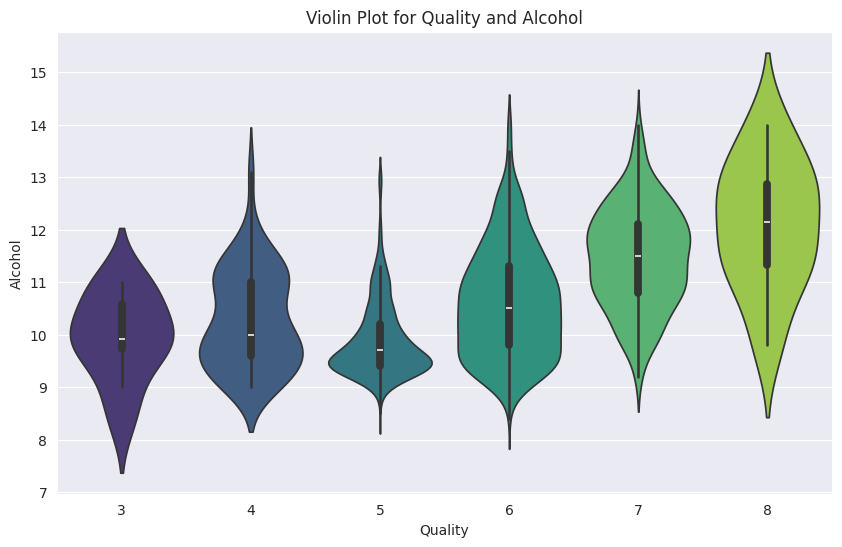

In [38]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()



*   Wider width: Higher density (more data points)
*   Symmetrical plot: Balanced distribution
*   Peak or bulge: Most common value in distribution
*   Longer tails: Greater variability
*   Medium line: Gives info about central tendencies

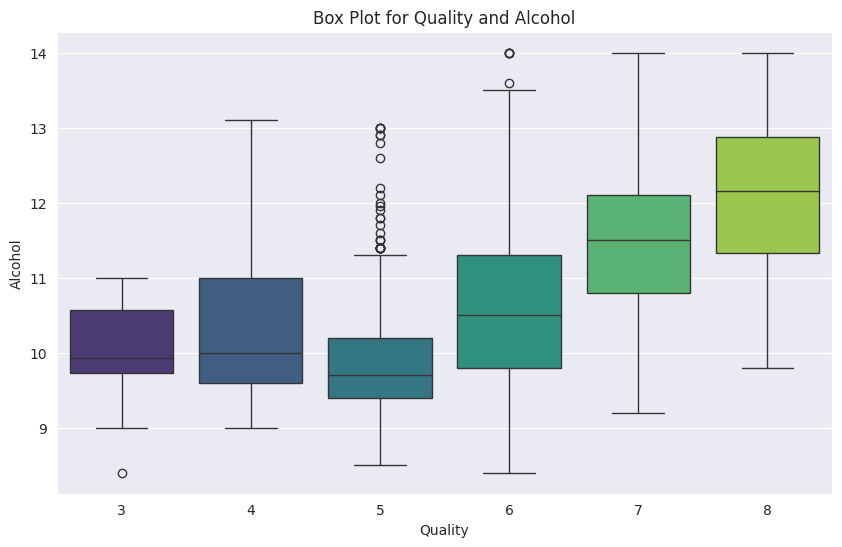

In [39]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Box Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()



*   Longer box: High variability
*   Compact box: Low variability
*   Median line: Central tendency
*   Whiskers: Extend from box to the smallest and largest values within a specified range.
*   Outliers: Points beyond the whiskers


## 3. Multivariate Analysis

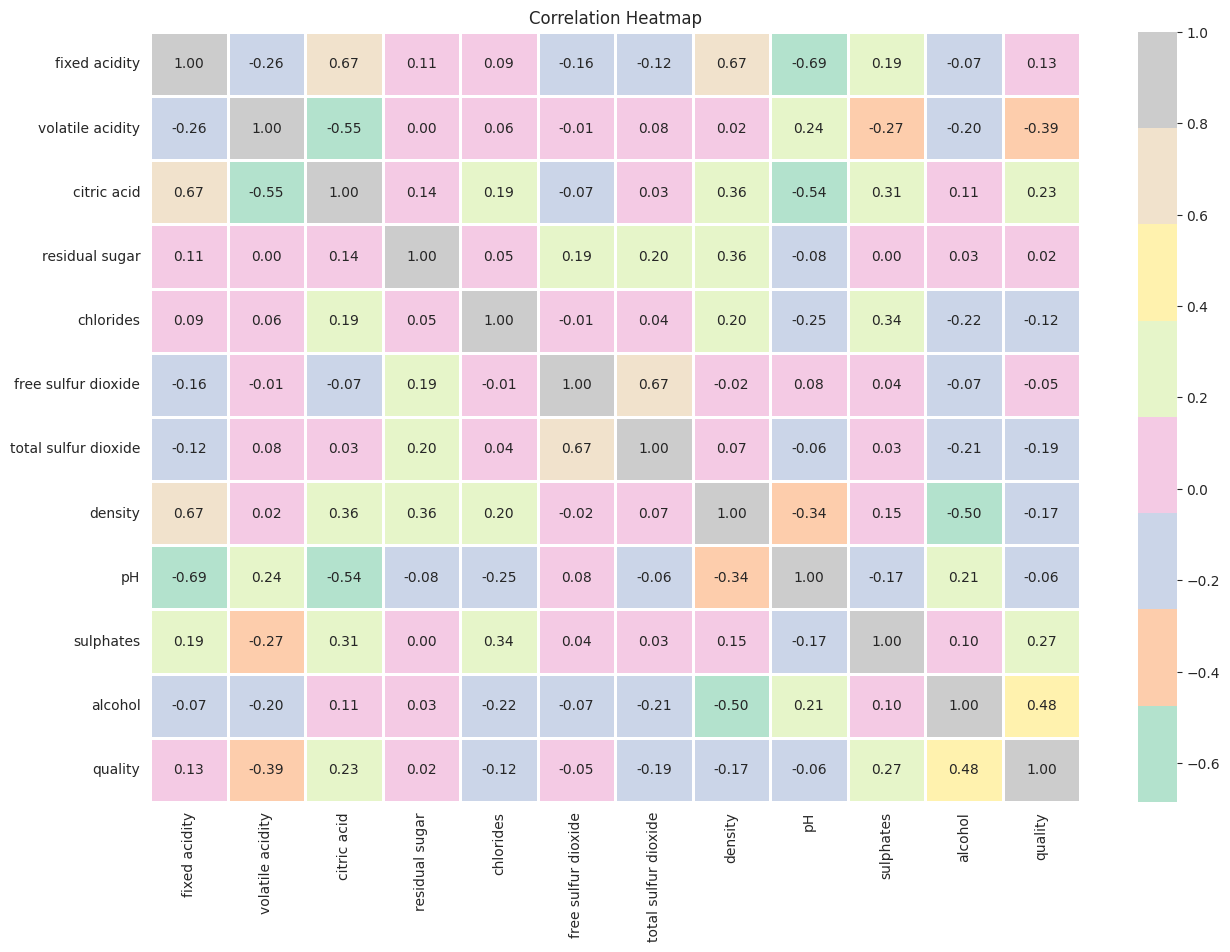

In [40]:
# Correlation Matrix

plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()



*   Values close to 1 : Strong Positive Correlation (Variables move in same direction)
*   Values close to -1: Strong Negative Correlation (Variables move in opposite direction)
*   Value close to 0  : No Linear Correlation



